# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset: https://www.kaggle.com/datasets/patkle/coffeereviewcom-over-7000-ratings-and-reviews

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

coffee_df = pd.read_csv("clean_coffee.csv")
coffee_df = coffee_df.drop('Unnamed: 0', axis=1)

coffee_df.describe()


,rating,aftertaste,aroma,body,flavor,dollars_per_ounce
count,3558.000000,3558.000000,3558.000000,3558.000000,3558.000000,3558.000000
mean,92.470489,8.070826,8.708544,8.439011,8.871557,1.905811
std,1.939513,0.573070,0.539359,0.557683,0.484306,1.424509
min,80.000000,5.000000,6.000000,6.000000,6.000000,0.280938
25%,92.000000,8.000000,8.000000,8.000000,9.000000,1.237500
50%,93.000000,8.000000,9.000000,8.000000,9.000000,1.479167
75%,94.000000,8.000000,9.000000,9.000000,9.000000,1.833333
max,97.000000,10.000000,10.000000,10.000000,10.000000,9.987500


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

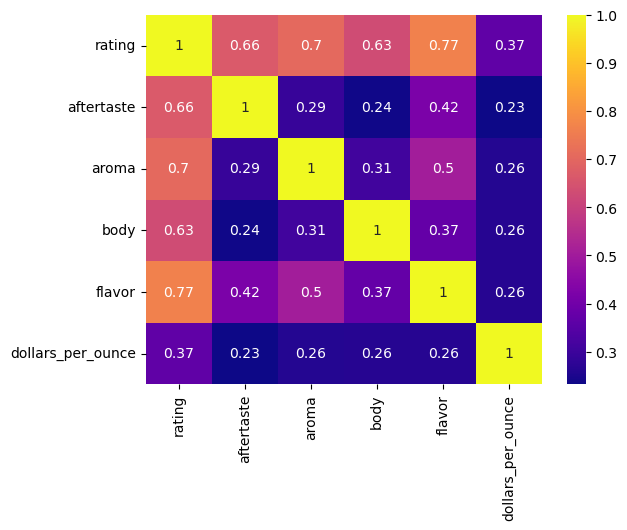

In [2]:
sns.heatmap(coffee_df.corr(), cmap="plasma", annot = True)
plt.show()


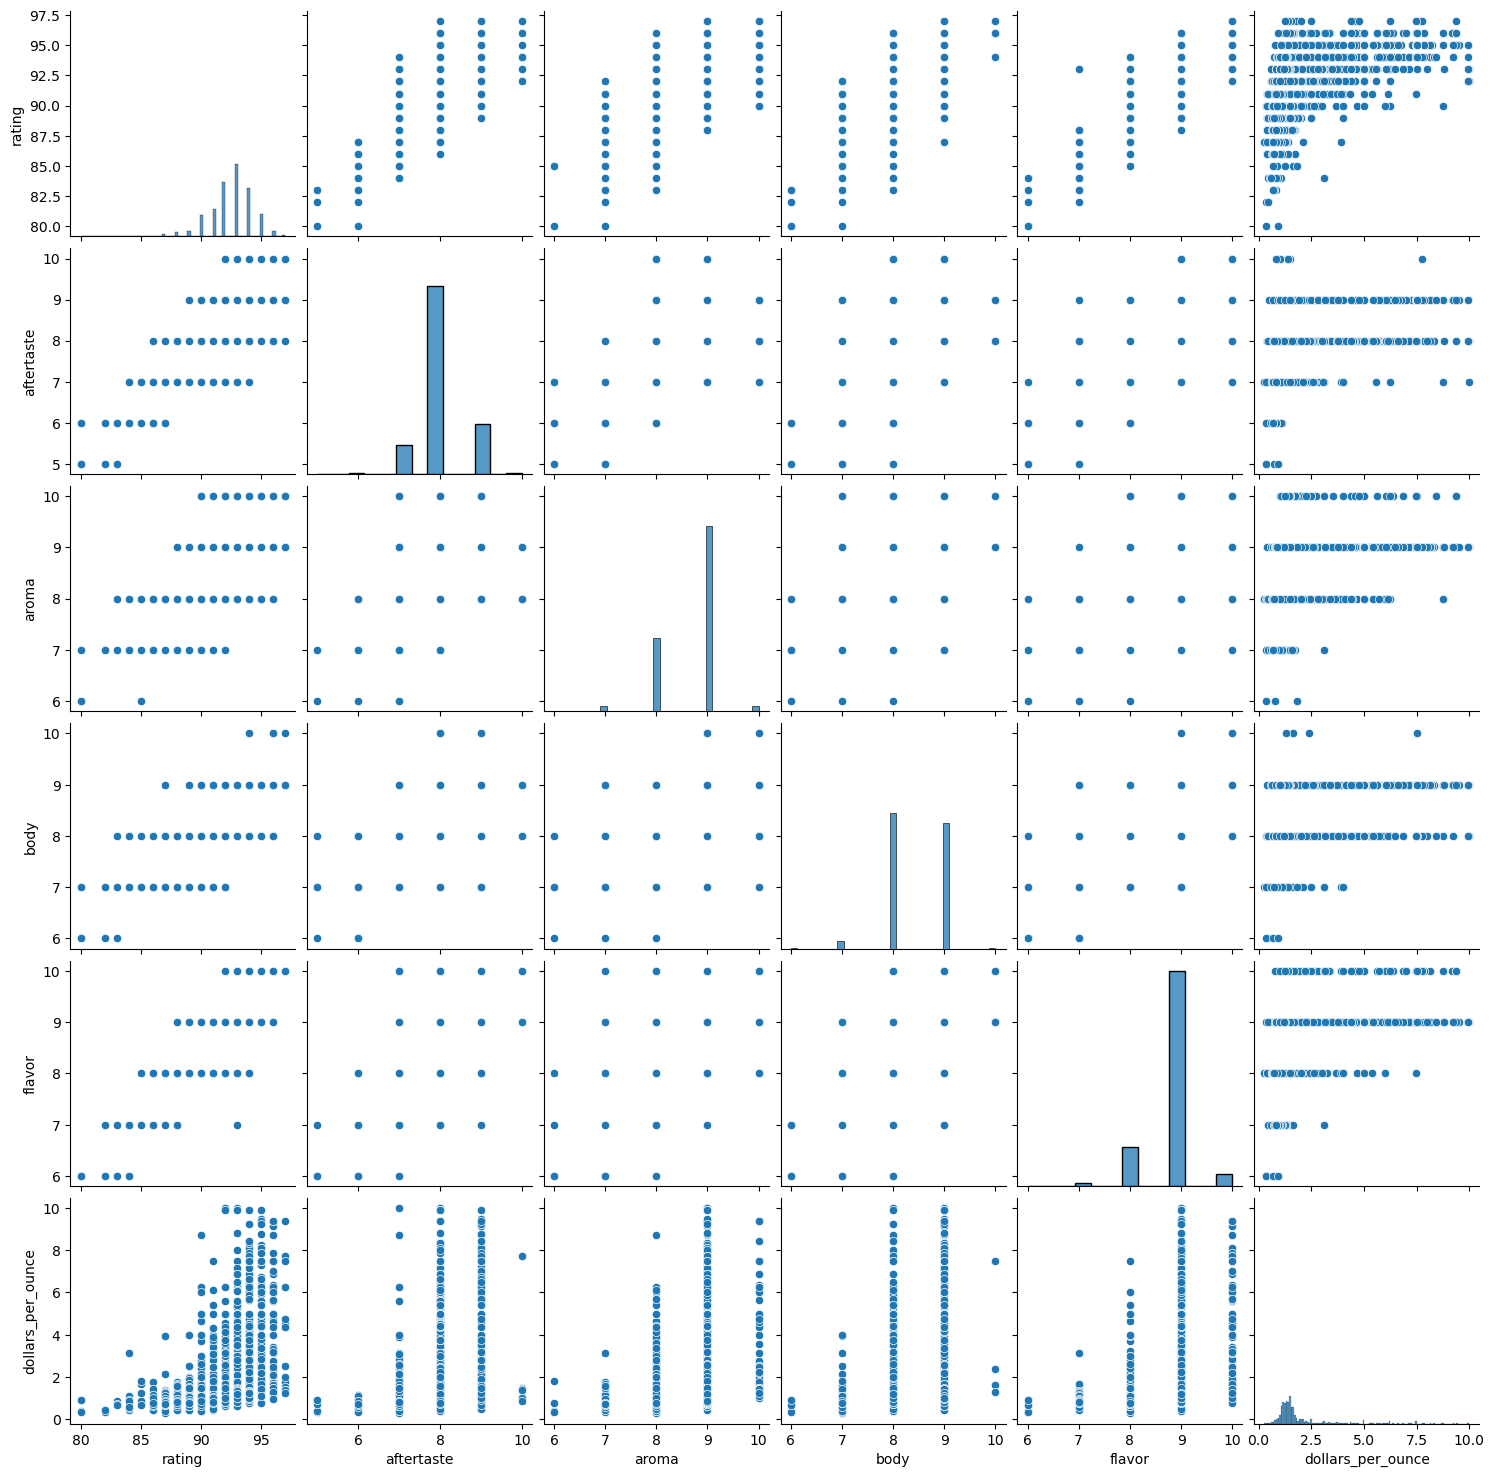

In [3]:
sns.pairplot(coffee_df)
plt.show()


## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [4]:
# Even though the strongest correlation was between rating and flavor, I thought that would be too boring. 
# So I looked at the relationship between price and rating.
X = coffee_df['dollars_per_ounce']
y = coffee_df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     377.9
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.81e-78
Time:                        10:54:10   Log-Likelihood:                -5029.7
No. Observations:                2490   AIC:                         1.006e+04
Df Residuals:                    2488   BIC:                         1.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                91.5230      0.062   1487.233      0.000      91.402      91.644
dollars_per_ounce     0.5032      0.026     19.438      0.000       0.452       0.554
==============================================================================
Omnibus:                      648.750   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2293.127
Skew:                          -1.265   Prob(JB):                         0.00
Kurtosis:                       6.963   Cond. No.                         4.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

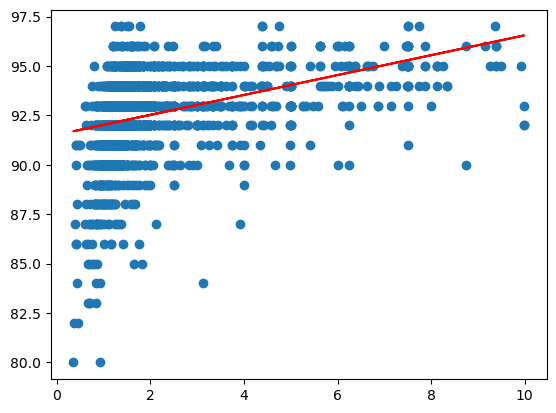

In [5]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 91.523 + 0.5032*X_train, 'r')
plt.show()


## Error Terms

Finally, plot your error terms!

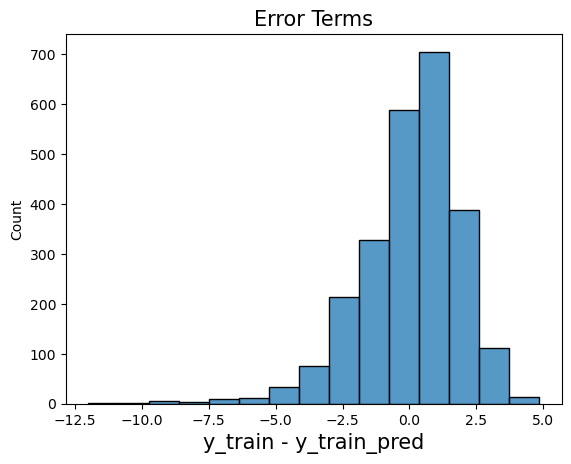

In [6]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

fig = plt.figure()
sns.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()


## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.132
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset?  It worked moderately well, but there's quite a bit of spread in the data. It looks like price is not necessarily a great predictor of rating, especially amongst the lower-priced coffees. This is great for the consumer, since a low-priced coffee could easily be one of the highest-rated. Also, in the scatterplot, it looks like the data points are clustered more tightly around the line in the higher range of prices, indicating that if you buy an expensive coffee, the likelihood that it's highly-rated is very high.
3. Was your plot of the error terms a bell curve? Yes, with a negative skew.